# Pima Indians Diabetes Database

**Name: Manav Kamlesh Parmar**

**Scope: Data Science**

**TASK : Diabetes is a type of chronic disease which is more common among the
people of all age groups. Predicting this disease at an early stage can help
a person to take the necessary
accordingly to either prevent the occurence of this disease or control the disease(For people who already have the disease).**

**1) Prepare the data-set 
set using several methods to train the model.**

**2) Build a model which 
which can give high accuracy of predicting the 
the disease.**





# IMPORTING THE LIBRARIES

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


# LOADING THE DATASET

In [7]:
data = pd.read_csv('diabetes.csv') 



In [8]:
data.head()  #displaying the head of dataset


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [66]:
data.describe()      #description of dataset 


,Actual,Predicted
count,154.000000,154.000000
mean,0.305195,0.292208
std,0.461992,0.456261
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
data.shape    #768 rows and 9 columns

(768, 9)

In [12]:
data.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
17           163      72             41             114      40.9  0.817                     47   1          1
15           136      70             32             110      37.1  0.153                     43   1          1
2            87       58             16             52       32.7  0.166                     25   0          1
                      0              23             0        28.9  0.773                     25   0          1
             85       65             0              0        39.6  0.930                     27   0          1
                                                                                                            ..
5            106      82             30             0        39.5  0.286                     38   0          1
             105      72             29             325      36.9  0.159                     28   0          1
      

In [13]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [14]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

***Checking Null Values***

In [15]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [16]:
data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [17]:
data.isnull().all()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

# Exploratory Data Analysis

In [18]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


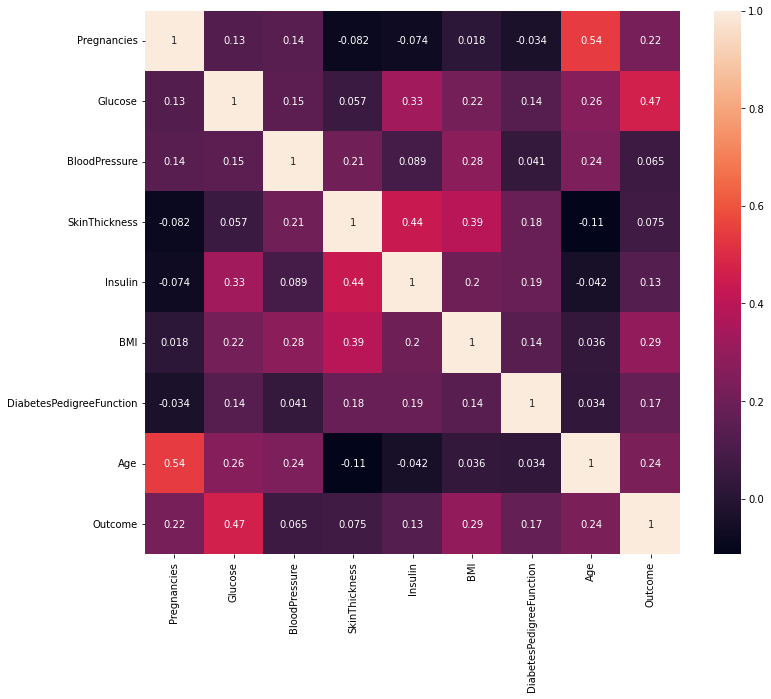

In [19]:
plt.figure(figsize = (12,10))

sns.heatmap(data.corr(), annot =True)



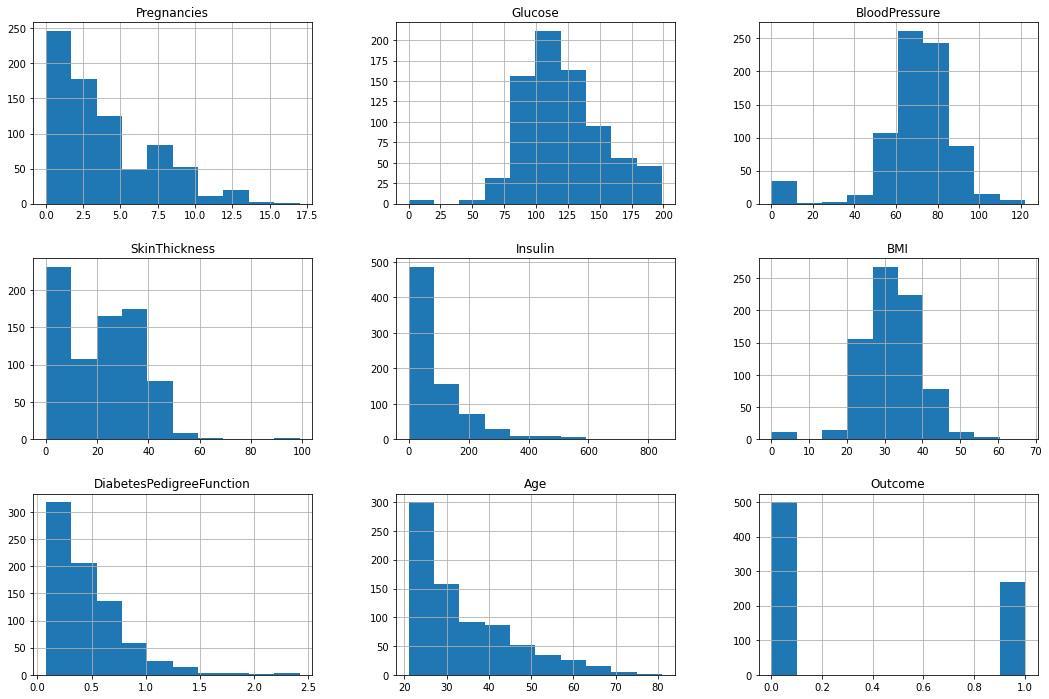

In [20]:
data.hist(figsize=(18,12))
plt.show()



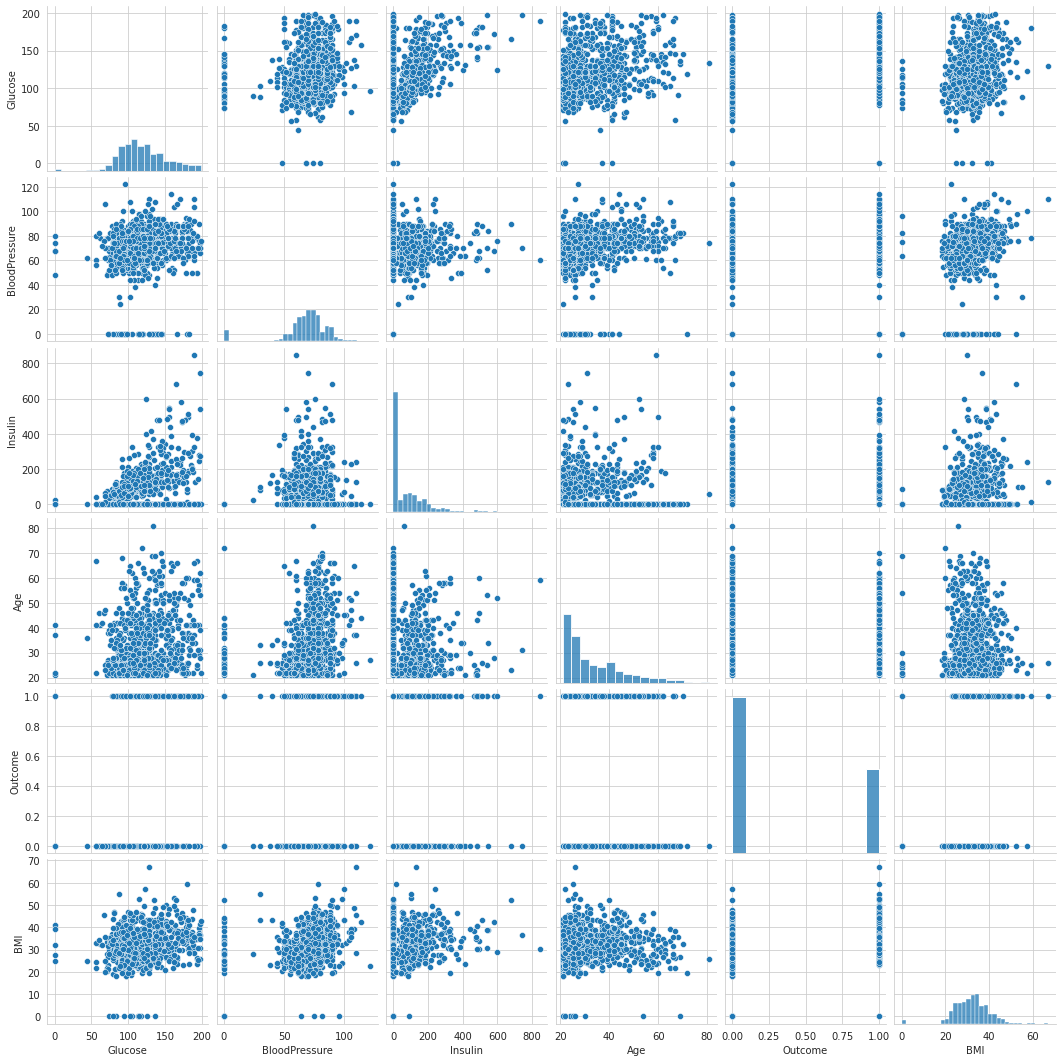

In [22]:
 
mean_col = ['Glucose','BloodPressure','Insulin','Age','Outcome','BMI']

sns.pairplot(data[mean_col],palette='Accent')


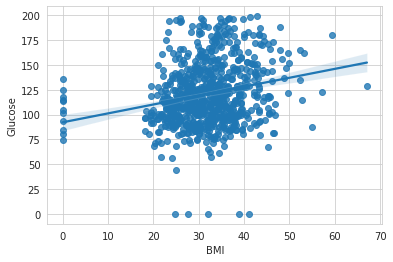

In [24]:
sns.regplot(x='BMI', y= 'Glucose', data=data)

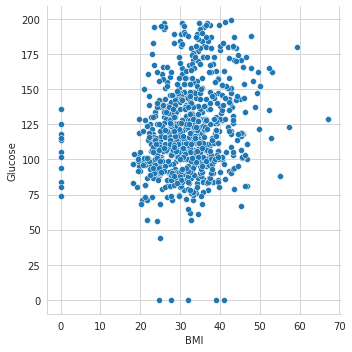

In [25]:
sns.relplot(x='BMI', y= 'Glucose', data=data)

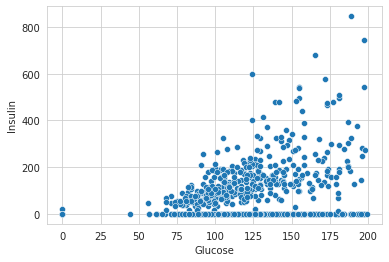

In [26]:
sns.scatterplot(x='Glucose', y= 'Insulin', data=data)

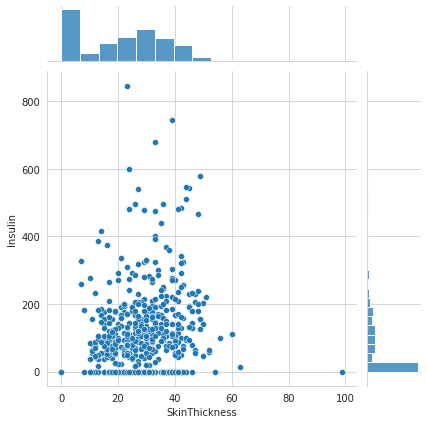

In [27]:
sns.jointplot(x='SkinThickness', y= 'Insulin', data=data)

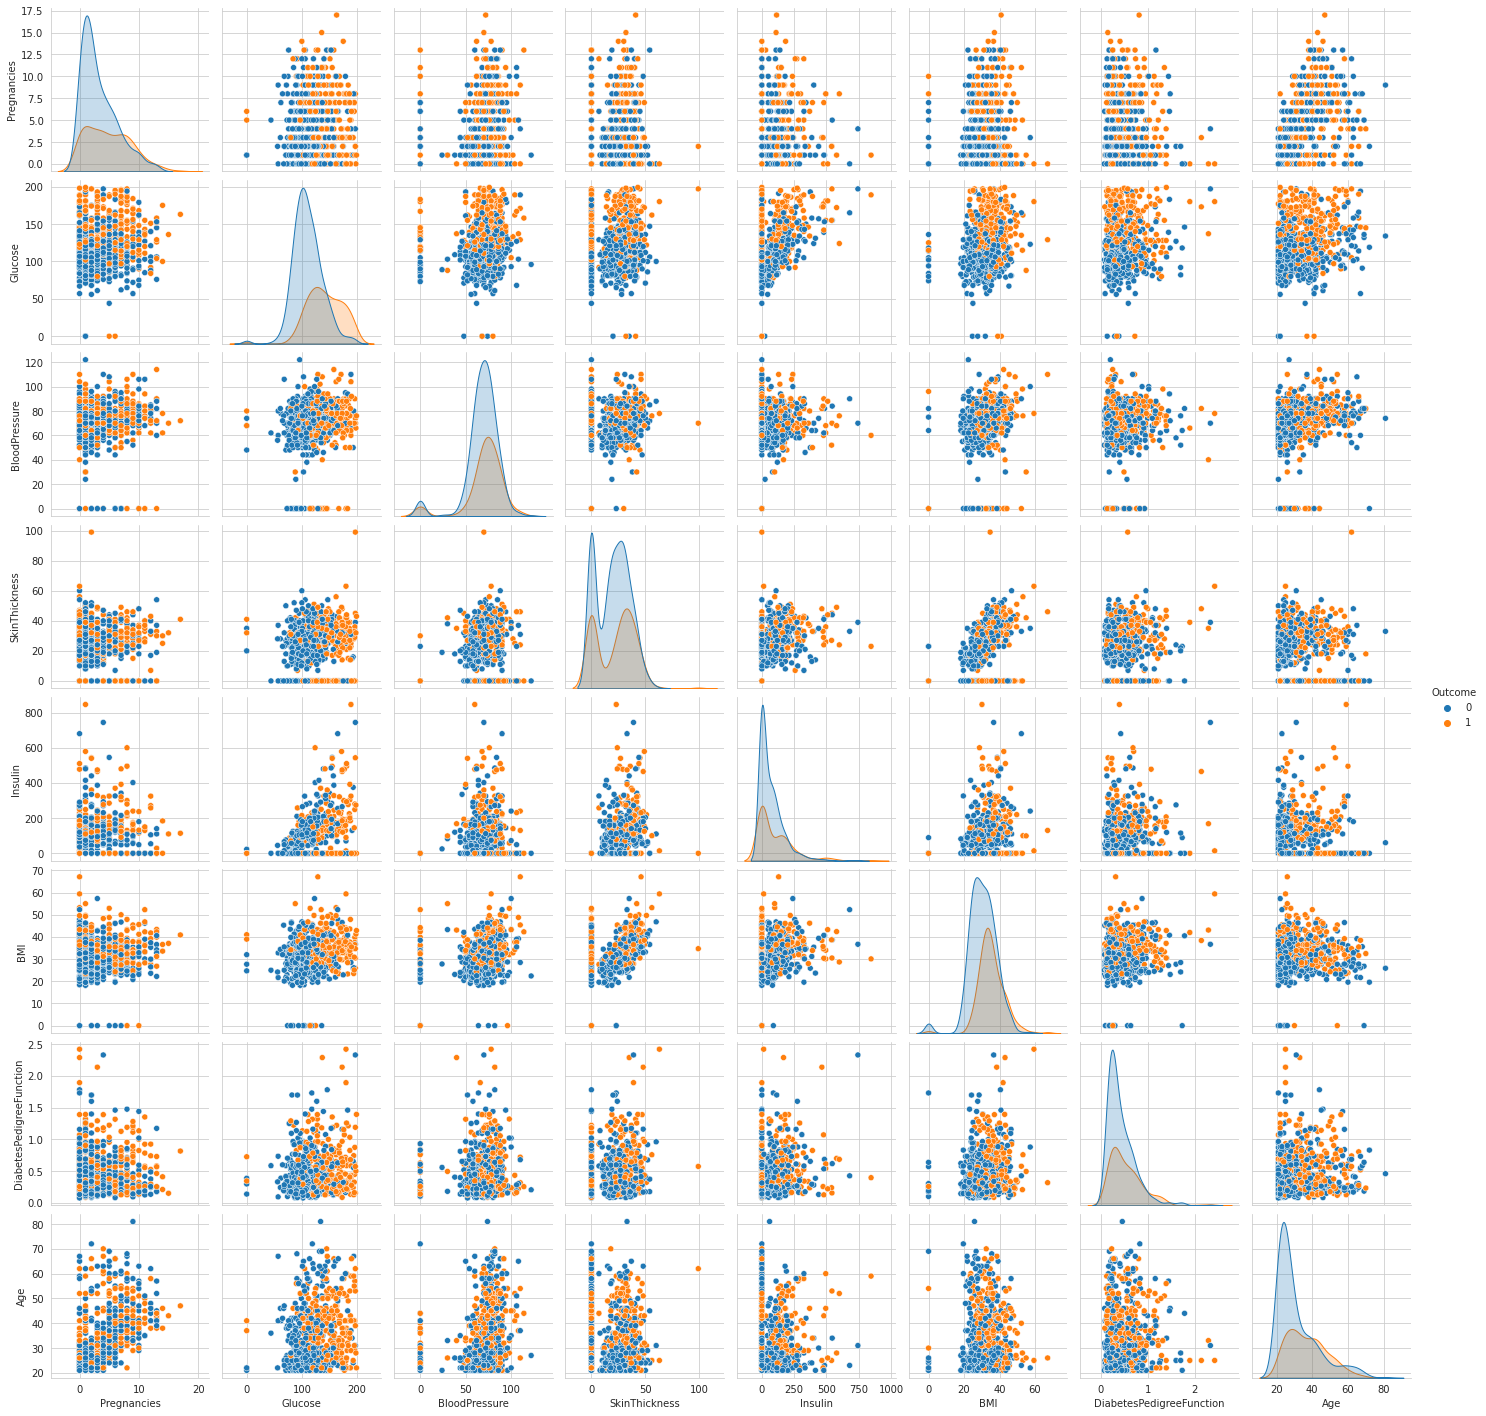

In [28]:
sns.pairplot(data,hue='Outcome')


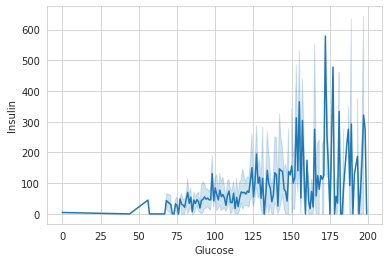

In [29]:
sns.lineplot(x='Glucose', y= 'Insulin', data=data)

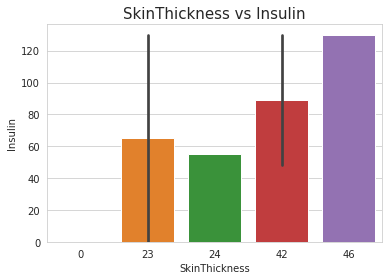

In [31]:
sns.barplot(x="SkinThickness", y="Insulin", data=data[170:180])
plt.title("SkinThickness vs Insulin",fontsize=15)
plt.xlabel("SkinThickness")
plt.ylabel("Insulin")
plt.show()
plt.style.use("ggplot")


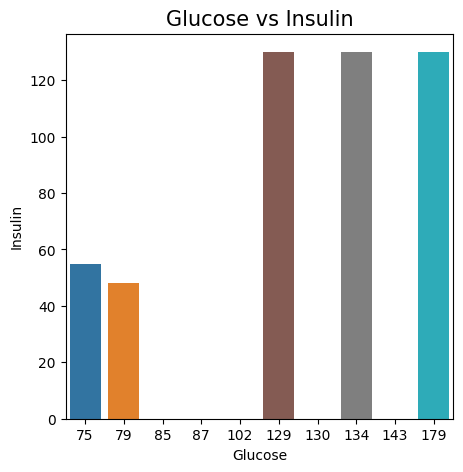

In [32]:
plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(x="Glucose", y="Insulin", data=data[170:180])
plt.title("Glucose vs Insulin",fontsize=15)
plt.xlabel("Glucose")
plt.ylabel("Insulin")
plt.show()


# TRAINING AND TESTING DATA

In [33]:
#train_test_splitting of the dataset

x = data.drop(columns = 'Outcome')

# Getting Predicting Value
y = data['Outcome']

from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)


In [34]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))


614
154
614
154


# MODELS

# 1. Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train,y_train)                         

LogisticRegression()

In [36]:
y_pred=reg.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",reg.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))


Classification Report is:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154

Confusion Matrix:
 [[98  9]
 [18 29]]
Training Score:
 77.19869706840392
Mean Squared Error:
 0.17532467532467533
R2 score is:
 0.1731954662954862


In [37]:
print(accuracy_score(y_test,y_pred)*100)

82.46753246753246


**So we get a accuracy score of 82.46 % using Logistic Regression**

# 2. KNeighborsClassifier

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)

knn.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=7)

In [39]:
y_pred=knn.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",knn.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       107
           1       0.61      0.57      0.59        47

    accuracy                           0.76       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.76      0.76      0.76       154

Confusion Matrix:
 [[90 17]
 [20 27]]
Training Score:
 78.17589576547232
Mean Squared Error:
 0.24025974025974026
R2 score is:
 -0.13302843507655582


In [40]:
print(accuracy_score(y_test,y_pred)*100)



75.97402597402598


**So we get a accuracy score of 75.97 % using KNeighborsClassifier**

# 3. SVC

In [41]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)


SVC()

In [42]:
y_pred=svc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",svc.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))


Classification Report is:
               precision    recall  f1-score   support

           0       0.81      0.92      0.86       107
           1       0.73      0.51      0.60        47

    accuracy                           0.79       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.78      0.79      0.78       154

Confusion Matrix:
 [[98  9]
 [23 24]]
Training Score:
 75.8957654723127
Mean Squared Error:
 0.2077922077922078
R2 score is:
 0.020083515609465197


In [43]:


print(accuracy_score(y_test,y_pred)*100)


79.22077922077922


**So we get a accuracy score of 79.22 % using SVC**

# 4. Naive Bayes

In [44]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)


GaussianNB()

In [45]:
y_pred=gnb.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",gnb.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))


Classification Report is:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85       107
           1       0.67      0.62      0.64        47

    accuracy                           0.79       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.79      0.79      0.79       154

Confusion Matrix:
 [[93 14]
 [18 29]]
Training Score:
 75.7328990228013
Mean Squared Error:
 0.2077922077922078
R2 score is:
 0.020083515609465197


In [46]:
print("Accuracy Score:\n",gnb.score(x_train,y_train)*100)

Accuracy Score:
 75.7328990228013


**So we get a accuracy score of 75.73 % using Naiye Bayes**

# 5. DECISION TREE CLASSIFIER

In [47]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')

dtree.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=123)

In [48]:
y_pred=dtree.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",dtree.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.78      0.87      0.82       107
           1       0.59      0.43      0.49        47

    accuracy                           0.73       154
   macro avg       0.68      0.65      0.66       154
weighted avg       0.72      0.73      0.72       154

Confusion Matrix:
 [[93 14]
 [27 20]]
Training Score:
 82.08469055374593
Mean Squared Error:
 0.2662337662337662
R2 score is:
 -0.2555179956253728


In [49]:
print(accuracy_score(y_test,y_pred)*100)



73.37662337662337


**So we get accuracy score of 73.37 % using DecisionTreeClassifier**

# 6.  RandomForestClassifier

In [50]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)


RandomForestClassifier()

In [51]:
y_pred=rfc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",rfc.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))


Classification Report is:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       107
           1       0.71      0.68      0.70        47

    accuracy                           0.82       154
   macro avg       0.79      0.78      0.78       154
weighted avg       0.82      0.82      0.82       154

Confusion Matrix:
 [[94 13]
 [15 32]]
Training Score:
 100.0
Mean Squared Error:
 0.18181818181818182
R2 score is:
 0.14257307615828196


In [52]:
print(accuracy_score(y_test,y_pred)*100)

81.81818181818183


**So we get a accuracy score of 81.18 % using RandomForestClassifier**

# 7. AdaBoostClassifier

In [53]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(base_estimator = None)
adb.fit(x_train,y_train)




AdaBoostClassifier()

In [54]:
y_pred=adb.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",adb.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))


Classification Report is:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84       107
           1       0.63      0.66      0.65        47

    accuracy                           0.78       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.78      0.78      0.78       154

Confusion Matrix:
 [[89 18]
 [16 31]]
Training Score:
 81.75895765472313
Mean Squared Error:
 0.22077922077922077
R2 score is:
 -0.0411612646649433


In [55]:
print(accuracy_score(y_test,y_pred)*100)

77.92207792207793


**So we get a accuracy score of 77.92 % using AdaBoostClassifier**

# 8. Gradient Boosting Classifier

In [56]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)


GradientBoostingClassifier()

In [57]:
y_pred=gbc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",gbc.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       107
           1       0.68      0.68      0.68        47

    accuracy                           0.81       154
   macro avg       0.77      0.77      0.77       154
weighted avg       0.81      0.81      0.81       154

Confusion Matrix:
 [[92 15]
 [15 32]]
Training Score:
 91.85667752442997
Mean Squared Error:
 0.19480519480519481
R2 score is:
 0.08132829588387358


In [58]:
print(accuracy_score(y_test,y_pred)*100)

80.51948051948052


**So we get a accuracy score of 81.81 % using GradientBoostingClassifier**

# 9. XGBClassifier

In [59]:
from xgboost import XGBClassifier

xgb =XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xgb.fit(x_train, y_train)


[04:52:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBClassifier(alpha=10, colsample_bytree=0.3, max_depth=5, n_estimators=10,
              objective='reg:linear')

In [60]:
y_pred=xgb.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",xgb.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.84      0.93      0.88       107
           1       0.80      0.60      0.68        47

    accuracy                           0.83       154
   macro avg       0.82      0.77      0.78       154
weighted avg       0.83      0.83      0.82       154

Confusion Matrix:
 [[100   7]
 [ 19  28]]
Training Score:
 86.31921824104235
Mean Squared Error:
 0.16883116883116883
R2 score is:
 0.20381785643269046


In [61]:
xbg_accuracy=print(accuracy_score(y_test,y_pred)*100)

83.11688311688312


**So we get a accuracy score of 83.11 % using XGBClassifier**

> Indented block



# 10. ExtraTreesClassifier

In [62]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=100, random_state=0)
etc.fit(x_train,y_train)

ExtraTreesClassifier(random_state=0)

In [63]:
y_pred=etc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",etc.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       107
           1       0.69      0.66      0.67        47

    accuracy                           0.81       154
   macro avg       0.77      0.76      0.77       154
weighted avg       0.80      0.81      0.80       154

Confusion Matrix:
 [[93 14]
 [16 31]]
Training Score:
 100.0
Mean Squared Error:
 0.19480519480519481
R2 score is:
 0.08132829588387358


In [64]:
print(accuracy_score(y_test,y_pred)*100)

80.51948051948052


 **So we get a accuracy score of 80.51 % using ExtraTreesClassifier**

In [65]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data


,Actual,Predicted
661,1,1
122,0,0
113,0,0
14,1,0
529,0,0
...,...,...
476,1,0
482,0,0
230,1,0
527,0,0


***So now we conclude the accuracy of different models:***

* Logistic Regression= 82.46 %
* KNeighbors Classifier= 75.97 %
* SVC= 79.22 %
* Naiye Bayes= 75.73 %
* Decision Tree Classifier= 73.37%
* Random Forest Classifier= 81.57%
* Ada Boost Classifier= 77.92%
* Gradient Boosting Classifier= 81.81%
* XGB Classifier= 83.11%
* Extra Trees Classifier= 80.51%





In [ ]:
# Code for my Frontend DIabetes prediction application. Copy paste the code and save using .py extension and run.

In [ ]:
# #pip install streamlit
# #pip install pandas
# #pip install sklearn


# # IMPORT STATEMENTS
# import streamlit as st
# import pandas as pd
# from PIL import Image
# import numpy as np
# import matplotlib.pyplot as plt
# import plotly.figure_factory as ff
# from sklearn.metrics import accuracy_score
# from sklearn.ensemble import LogisticRegression
# from sklearn.model_selection import train_test_split
# import seaborn as sns



# df = pd.read_csv('diabetes.csv')

# # HEADINGS
# st.title("Diabetes Checkup")
# st.sidebar.header('Patient Data')
# st.subheader('Training Data Stats')
# st.write(df.describe())


# # X AND Y DATA
# x = df.drop(['Outcome'], axis = 1)
# y = df.iloc[:, -1]
# x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)


# # FUNCTION
# def user_report():
#   pregnancies = st.sidebar.slider('Pregnancies', 0,17, 3 )
#   glucose = st.sidebar.slider('Glucose', 0,200, 120 )
#   bp = st.sidebar.slider('Blood Pressure', 0,122, 70 )
#   skinthickness = st.sidebar.slider('Skin Thickness', 0,100, 20 )
#   insulin = st.sidebar.slider('Insulin', 0,846, 79 )
#   bmi = st.sidebar.slider('BMI', 0,67, 20 )
#   dpf = st.sidebar.slider('Diabetes Pedigree Function', 0.0,2.4, 0.47 )
#   age = st.sidebar.slider('Age', 21,88, 33 )

#   user_report_data = {
#       'pregnancies':pregnancies,
#       'glucose':glucose,
#       'bp':bp,
#       'skinthickness':skinthickness,
#       'insulin':insulin,
#       'bmi':bmi,
#       'dpf':dpf,
#       'age':age
#   }
#   report_data = pd.DataFrame(user_report_data, index=[0])
#   return report_data




# # PATIENT DATA
# user_data = user_report()
# st.subheader('Patient Data')
# st.write(user_data)




# # MODEL
# rf  = LogisticRegression()
# rf.fit(x_train, y_train)
# user_result = rf.predict(user_data)



# # VISUALISATIONS
# st.title('Visualised Patient Report')



# # COLOR FUNCTION
# if user_result[0]==0:
#   color = 'blue'
# else:
#   color = 'red'


# # Age vs Pregnancies
# st.header('Pregnancy count Graph (Others vs Yours)')
# fig_preg = plt.figure()
# ax1 = sns.scatterplot(x = 'Age', y = 'Pregnancies', data = df, hue = 'Outcome', palette = 'Greens')
# ax2 = sns.scatterplot(x = user_data['age'], y = user_data['pregnancies'], s = 150, color = color)
# plt.xticks(np.arange(10,100,5))
# plt.yticks(np.arange(0,20,2))
# plt.title('0 - Healthy & 1 - Unhealthy')
# st.pyplot(fig_preg)



# # Age vs Glucose
# st.header('Glucose Value Graph (Others vs Yours)')
# fig_glucose = plt.figure()
# ax3 = sns.scatterplot(x = 'Age', y = 'Glucose', data = df, hue = 'Outcome' , palette='magma')
# ax4 = sns.scatterplot(x = user_data['age'], y = user_data['glucose'], s = 150, color = color)
# plt.xticks(np.arange(10,100,5))
# plt.yticks(np.arange(0,220,10))
# plt.title('0 - Healthy & 1 - Unhealthy')
# st.pyplot(fig_glucose)



# # Age vs Bp
# st.header('Blood Pressure Value Graph (Others vs Yours)')
# fig_bp = plt.figure()
# ax5 = sns.scatterplot(x = 'Age', y = 'BloodPressure', data = df, hue = 'Outcome', palette='Reds')
# ax6 = sns.scatterplot(x = user_data['age'], y = user_data['bp'], s = 150, color = color)
# plt.xticks(np.arange(10,100,5))
# plt.yticks(np.arange(0,130,10))
# plt.title('0 - Healthy & 1 - Unhealthy')
# st.pyplot(fig_bp)


# # Age vs St
# st.header('Skin Thickness Value Graph (Others vs Yours)')
# fig_st = plt.figure()
# ax7 = sns.scatterplot(x = 'Age', y = 'SkinThickness', data = df, hue = 'Outcome', palette='Blues')
# ax8 = sns.scatterplot(x = user_data['age'], y = user_data['skinthickness'], s = 150, color = color)
# plt.xticks(np.arange(10,100,5))
# plt.yticks(np.arange(0,110,10))
# plt.title('0 - Healthy & 1 - Unhealthy')
# st.pyplot(fig_st)


# # Age vs Insulin
# st.header('Insulin Value Graph (Others vs Yours)')
# fig_i = plt.figure()
# ax9 = sns.scatterplot(x = 'Age', y = 'Insulin', data = df, hue = 'Outcome', palette='rocket')
# ax10 = sns.scatterplot(x = user_data['age'], y = user_data['insulin'], s = 150, color = color)
# plt.xticks(np.arange(10,100,5))
# plt.yticks(np.arange(0,900,50))
# plt.title('0 - Healthy & 1 - Unhealthy')
# st.pyplot(fig_i)


# # Age vs BMI
# st.header('BMI Value Graph (Others vs Yours)')
# fig_bmi = plt.figure()
# ax11 = sns.scatterplot(x = 'Age', y = 'BMI', data = df, hue = 'Outcome', palette='rainbow')
# ax12 = sns.scatterplot(x = user_data['age'], y = user_data['bmi'], s = 150, color = color)
# plt.xticks(np.arange(10,100,5))
# plt.yticks(np.arange(0,70,5))
# plt.title('0 - Healthy & 1 - Unhealthy')
# st.pyplot(fig_bmi)


# # Age vs Dpf
# st.header('DPF Value Graph (Others vs Yours)')
# fig_dpf = plt.figure()
# ax13 = sns.scatterplot(x = 'Age', y = 'DiabetesPedigreeFunction', data = df, hue = 'Outcome', palette='YlOrBr')
# ax14 = sns.scatterplot(x = user_data['age'], y = user_data['dpf'], s = 150, color = color)
# plt.xticks(np.arange(10,100,5))
# plt.yticks(np.arange(0,3,0.2))
# plt.title('0 - Healthy & 1 - Unhealthy')
# st.pyplot(fig_dpf)



# # OUTPUT
# st.subheader('Your Report: ')
# output=''
# if user_result[0]==0:
#   output = 'You are not Diabetic'
# else:
#   output = 'You are Diabetic'
# st.title(output)
# st.subheader('Accuracy: ')
# st.write(str(accuracy_score(y_test, rf.predict(x_test))*100)+'%')
